# Project Name: Automobile Insurance Claims- Fraud Detection


About Project: In this project, we have provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. We are going to work with some auto insurance data to create a predictive model that predicts if an insurance claim is fraudulent or not.  

In [198]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [199]:
# Importing Dataset

ds= pd.read_csv("Automobile_insurance_fraud.csv")
ds.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [200]:
df= pd.DataFrame(data= ds)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [201]:
df.shape

(1000, 40)

In [202]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [204]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [205]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Observations: We can see that in almost all columns count is same except column _c39 where all values are Null. Also generaly for all columns SD is high. Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes.  

In [206]:
#Checking for Null values

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [207]:
df= df.drop('_c39', axis=1)

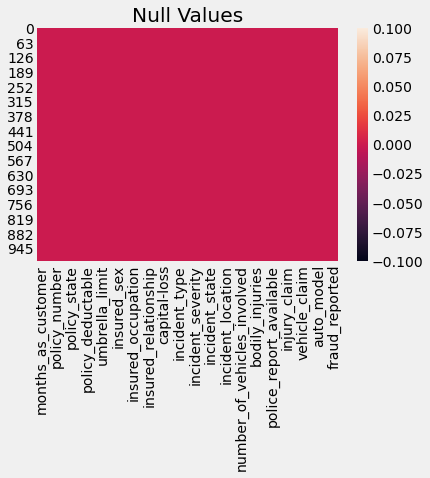

In [208]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Observations: Now there is no null values present in dataset.

In [209]:
#Getting Unique Values for Object data type columns

for i in df.columns:
    if df[i].dtypes== 'object':
        print(str(i), ' : ', df[i].unique())
        print(df[i].value_counts())
        print()
        print()

policy_bind_date  :  ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '1

Observations: We can see that in columns collision_type, property_damage and police_report_available we have unknown '?'. We can replace these by mode.

In [210]:
print(df['collision_type'].value_counts())
df['collision_type'].replace('?', 'Rear Collision', inplace=True)
print(df['collision_type'].unique())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
['Side Collision' 'Rear Collision' 'Front Collision']


In [211]:
print(df['property_damage'].value_counts())
df['property_damage'].replace('?', 'NO', inplace=True)
print(df['property_damage'].unique())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64
['YES' 'NO']


In [212]:
print(df['police_report_available'].value_counts())
df['police_report_available'].replace('?', 'NO', inplace=True)
print(df['police_report_available'].unique())

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64
['YES' 'NO']


# Feature Engineering

In [213]:
# Deriving the age of the vehicle based on the year value 

df['vehicle_age'] = 2018 - df['auto_year']
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [214]:
# Factorize according to the time period of the day


bins = [-1, 3, 6, 9, 12, 17, 20, 24]
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [215]:
#Dividing policy_csl
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [216]:
df['csl_per_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_per_person, dtype: object

In [217]:
df['csl_per_accident'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

# EDA

N    753
Y    247
Name: fraud_reported, dtype: int64


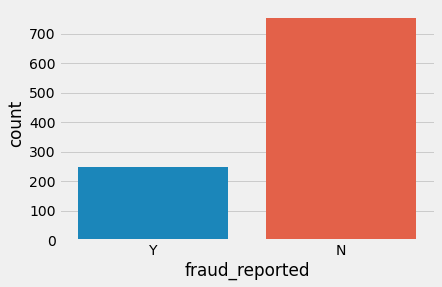

In [218]:
#Univariate Analysis
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'])

Observations: Here we see that almost 25% fraud reported. 

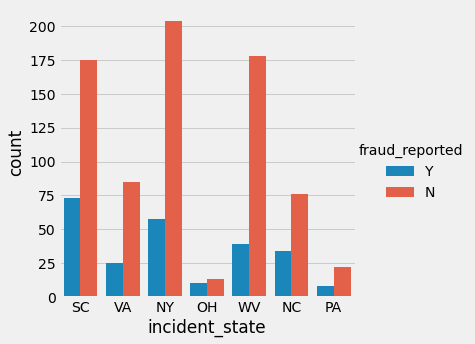

In [219]:
sns.catplot(x ='incident_state', hue ='fraud_reported', kind ="count", data = df)

Observations: We can see that in SC there is maximum fraud_detected and in NY state high rate of not fraud_detected.

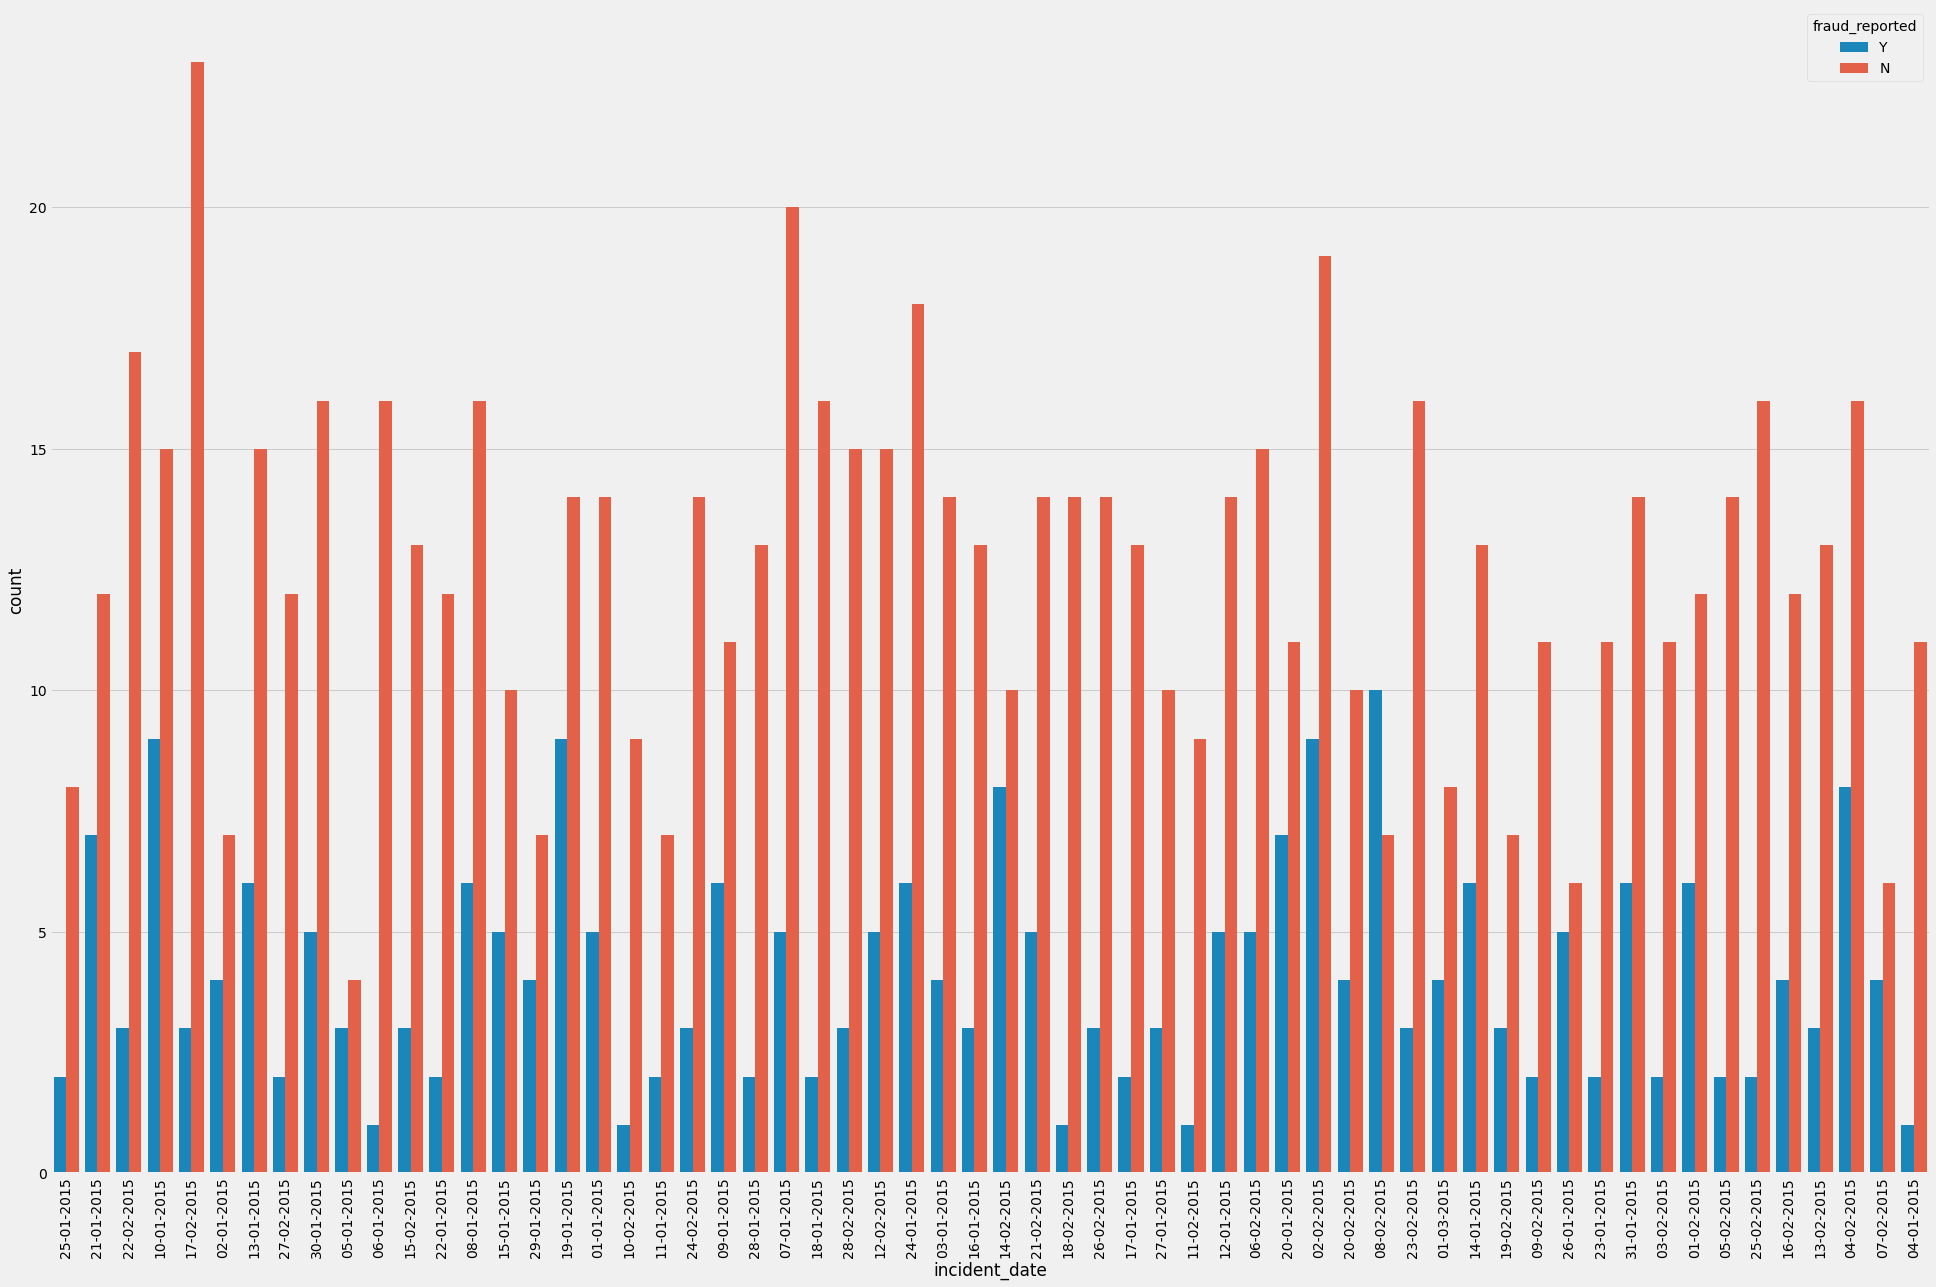

In [220]:
plt.subplots(figsize=(30,20))
plt.xticks(rotation=90)
sns.countplot('incident_date', hue= 'fraud_reported', data= df)

Observations: We can see that all cases are for the month of January and February 2015. 

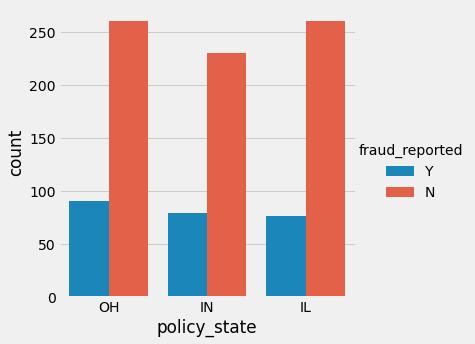

In [221]:
sns.catplot(x ='policy_state', hue ='fraud_reported', kind ="count", data = df)

Observations: We can see that in OH policy state there is more rate of fraud_reported.

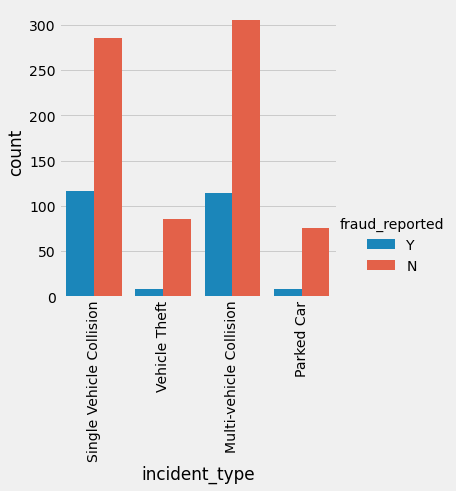

In [222]:
sns.catplot(x ='incident_type', hue ='fraud_reported', kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that for Single Vehicle Collision and Multi-Vehicle Collision more rate of fraud detected.

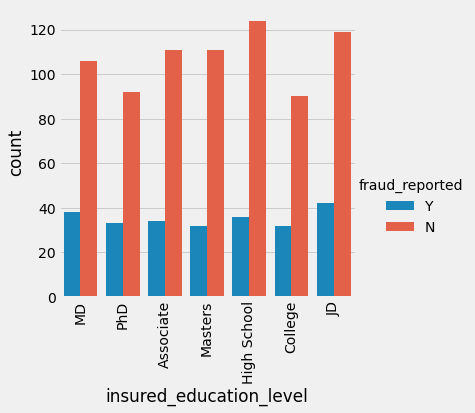

In [223]:
sns.catplot(x ='insured_education_level', hue ='fraud_reported', kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: Insurance person those having JD education level having high rate fraud_reported.

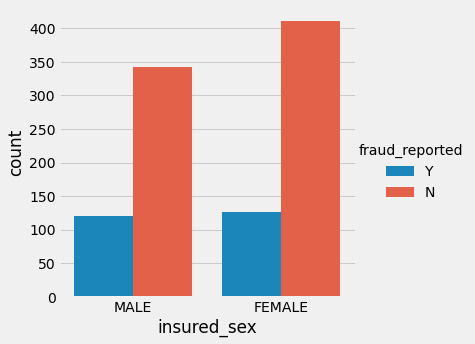

In [224]:
sns.catplot(x ='insured_sex', hue ='fraud_reported', kind ="count", data = df)

Observations: Rate of fraud_reported is almost same for both Male and Female.

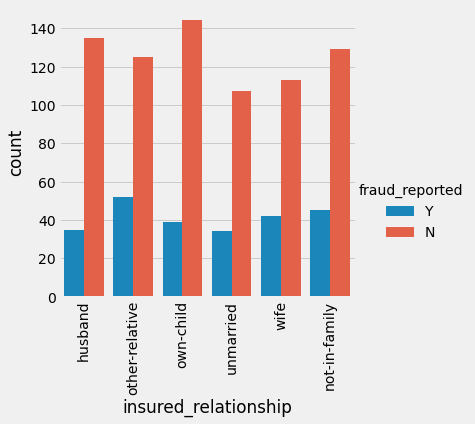

In [225]:
sns.catplot(x ='insured_relationship', hue ='fraud_reported', kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that more rate of fraud_reported is more by other-relative.

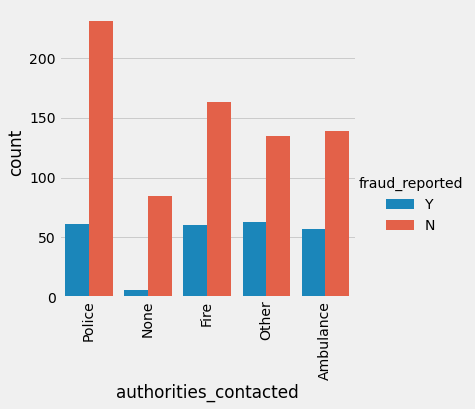

In [226]:
sns.catplot(x ='authorities_contacted', hue ='fraud_reported', kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that generaly for all authorities_contacted having same rate of fraud_reported.

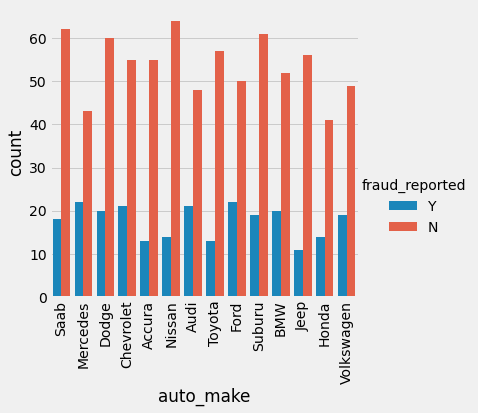

In [227]:
sns.catplot(x ='auto_make', hue ='fraud_reported', kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: Rate of fraud_reported is more for Ford and less for Jeep.

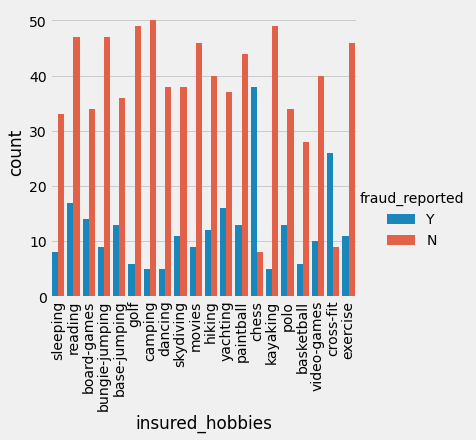

In [228]:
sns.catplot(x ='insured_hobbies', hue ='fraud_reported', kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: Rate of fraud_reported is more for chess insured_hobbies and less for camping.

In [229]:
# Droping Unwanted columns

df= df.drop([
    'policy_number', 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    'auto_year', 
    'incident_hour_of_the_day'], axis=1)

In [230]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day,csl_per_person,csl_per_accident
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,6510,13020,52080,Saab,92x,Y,14,early_morning,250,500
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,780,780,3510,Mercedes,E400,Y,11,morning,250,500
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,7700,3850,23100,Dodge,RAM,N,11,morning,100,300
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,6340,6340,50720,Chevrolet,Tahoe,Y,4,early_morning,250,500
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,1300,650,4550,Accura,RSX,N,9,evening,500,1000


In [231]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age', 'incident_period_of_day',
       'csl_per_person', 'csl_per_accident'],
      dtype='object')

In [232]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head() 

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day,csl_per_person,csl_per_accident
0,328,48,2,1000,1406.91,0,1,4,2,17,...,6510,13020,52080,10,1,1,14,1,1,2
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,780,780,3510,8,12,1,11,4,1,2
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,7700,3850,23100,4,30,0,11,4,0,1
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,6340,6340,50720,3,34,1,4,1,1,2
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,1300,650,4550,0,31,0,9,2,2,0


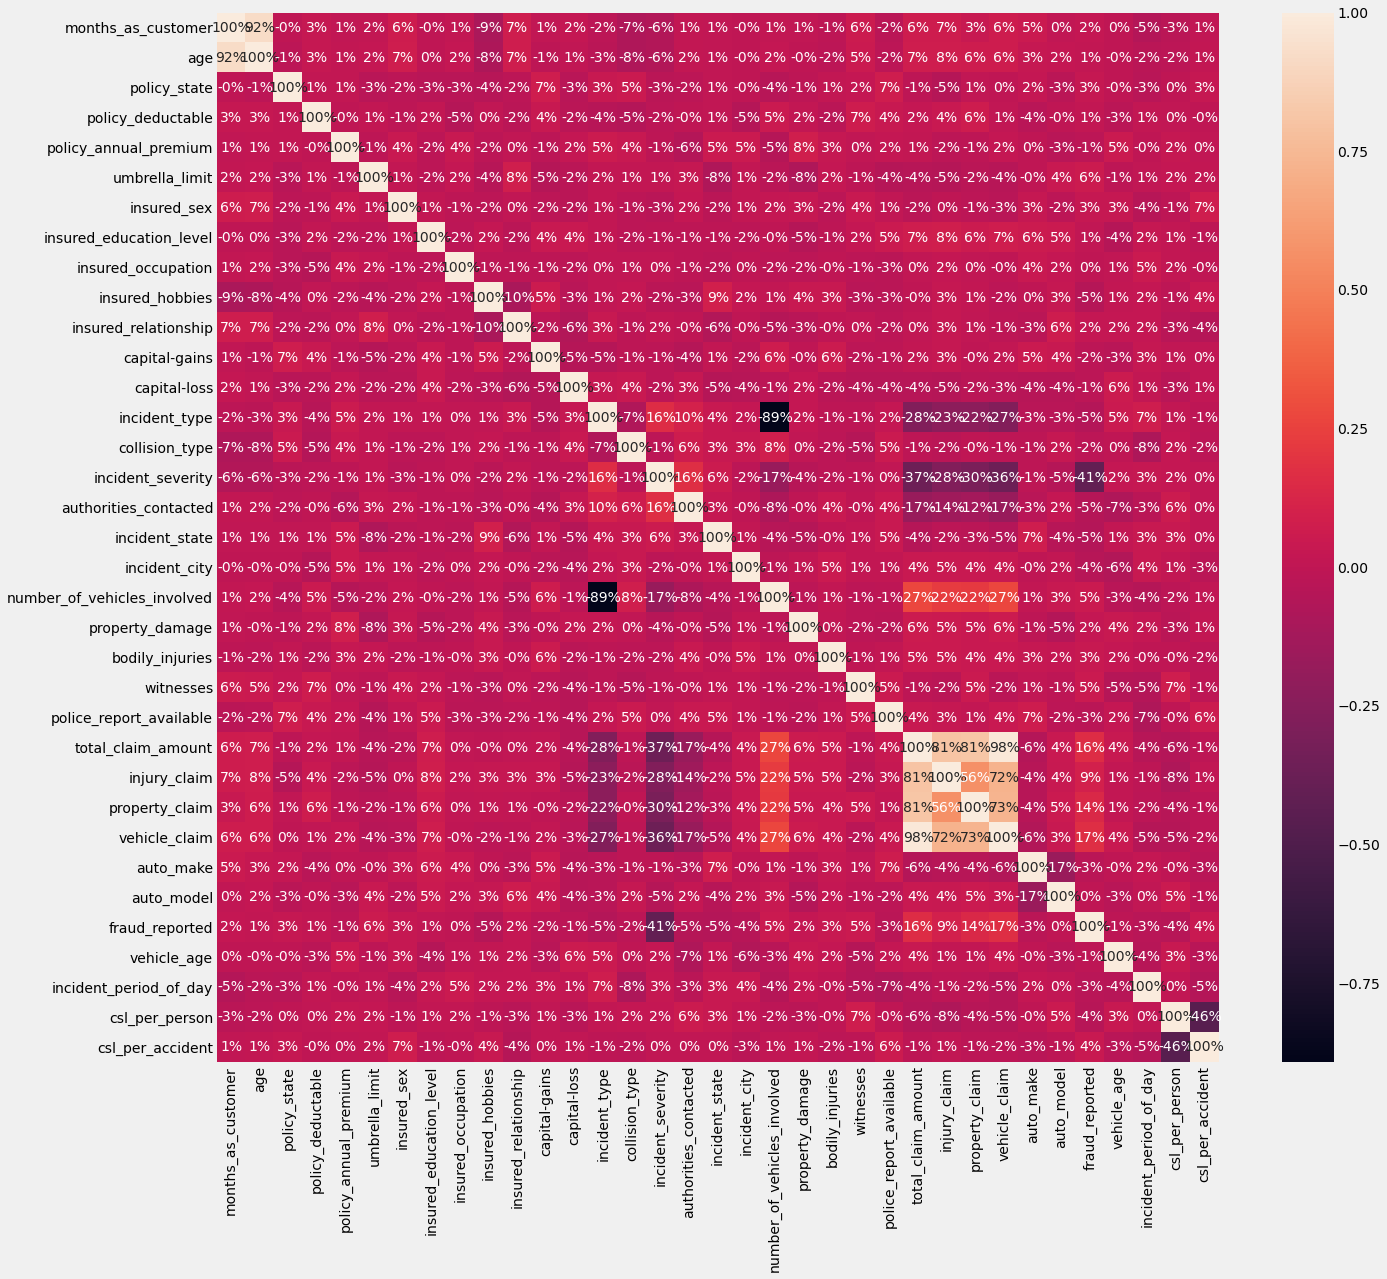

In [233]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: We can see that fraud_reported is highly correlated with vehicle_claim, property_claim and total_claim_amount. 

months_as_customer              AxesSubplot(0.08,0.78122;0.15x0.0987805)
age                             AxesSubplot(0.26,0.78122;0.15x0.0987805)
policy_state                    AxesSubplot(0.44,0.78122;0.15x0.0987805)
policy_deductable               AxesSubplot(0.62,0.78122;0.15x0.0987805)
policy_annual_premium            AxesSubplot(0.8,0.78122;0.15x0.0987805)
umbrella_limit                 AxesSubplot(0.08,0.662683;0.15x0.0987805)
insured_sex                    AxesSubplot(0.26,0.662683;0.15x0.0987805)
insured_education_level        AxesSubplot(0.44,0.662683;0.15x0.0987805)
insured_occupation             AxesSubplot(0.62,0.662683;0.15x0.0987805)
insured_hobbies                 AxesSubplot(0.8,0.662683;0.15x0.0987805)
insured_relationship           AxesSubplot(0.08,0.544146;0.15x0.0987805)
capital-gains                  AxesSubplot(0.26,0.544146;0.15x0.0987805)
capital-loss                   AxesSubplot(0.44,0.544146;0.15x0.0987805)
incident_type                  AxesSubplot(0.62,0.5

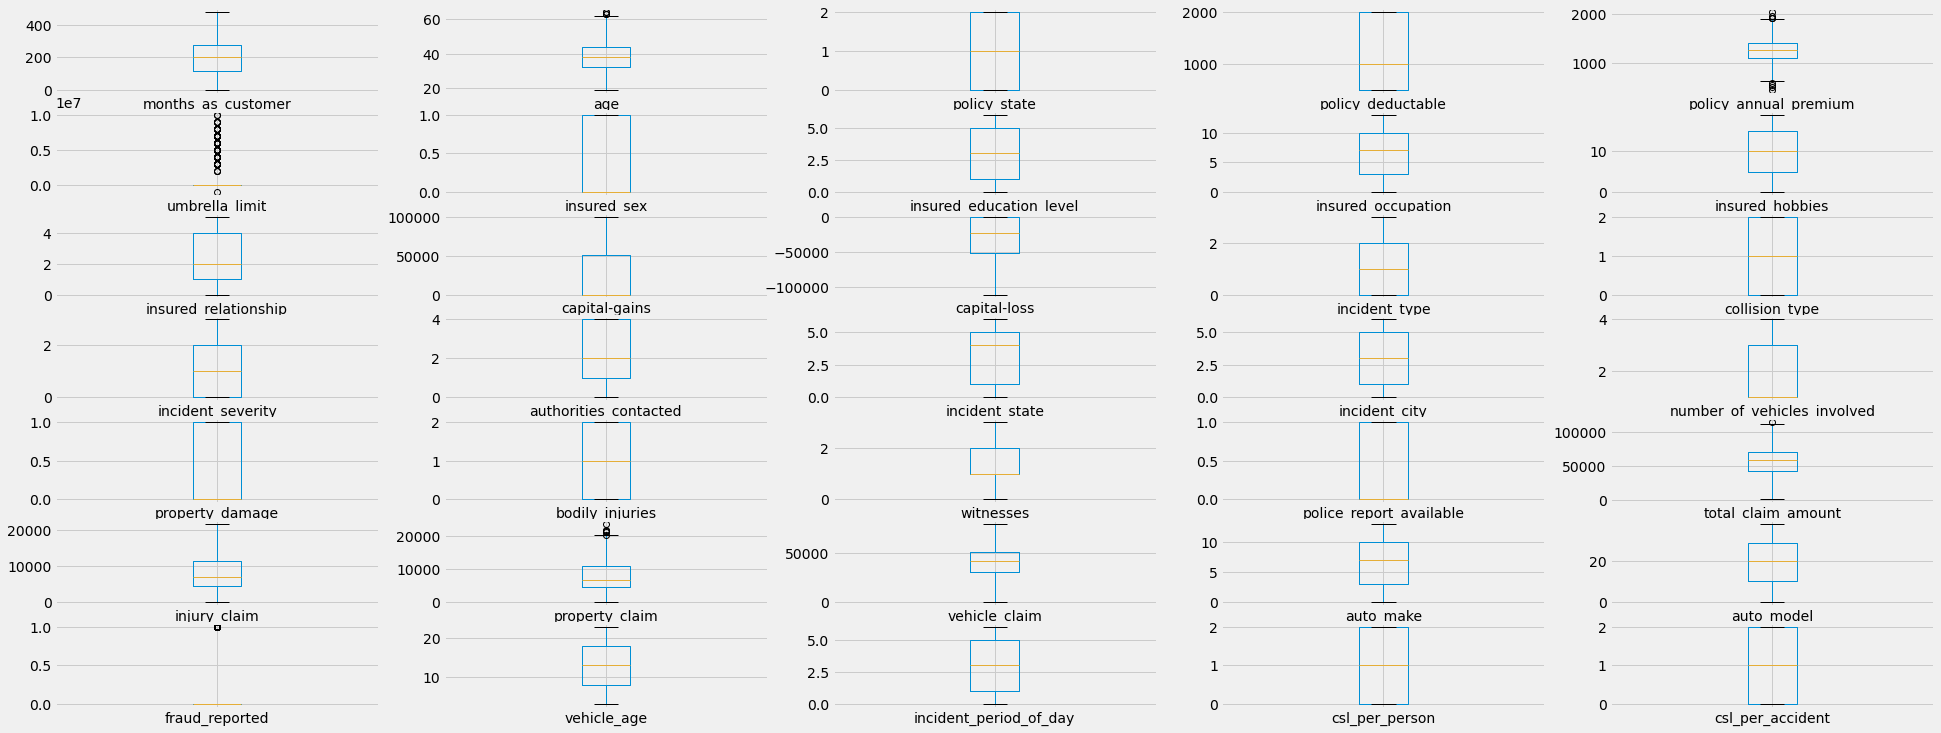

In [234]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (7,5), figsize=(30,12))

Observations: We can see that columns policy_annual_premium, umbrella_limit having outliers.

In [235]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day,csl_per_person,csl_per_accident
0,328,48,2,1000,1406.91,0,1,4,2,17,...,6510,13020,52080,10,1,1,14,1,1,2
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,780,780,3510,8,12,1,11,4,1,2
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,7700,3850,23100,4,30,0,11,4,0,1
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,6340,6340,50720,3,34,1,4,1,1,2
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,1300,650,4550,0,31,0,9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,17440,8720,61040,6,6,0,12,2,2,0
996,285,41,0,1000,1436.79,0,0,6,9,17,...,18080,18080,72320,13,28,0,3,5,0,1
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,7500,7500,52500,11,19,0,22,1,1,2
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,5220,5220,36540,1,5,0,20,6,2,0


In [236]:
df_new.shape

(980, 35)

In [237]:
df.shape

(1000, 35)

Observations: We can see that almost 20 rows removed due to outliers.

In [238]:
#Splitting DATA

df= df_new
x= df.drop('fraud_reported', axis=1)
y= df[['fraud_reported']]
print(x.shape)
print(y.shape)

(980, 34)
(980, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9A9EB6E50>,
      dtype=object)

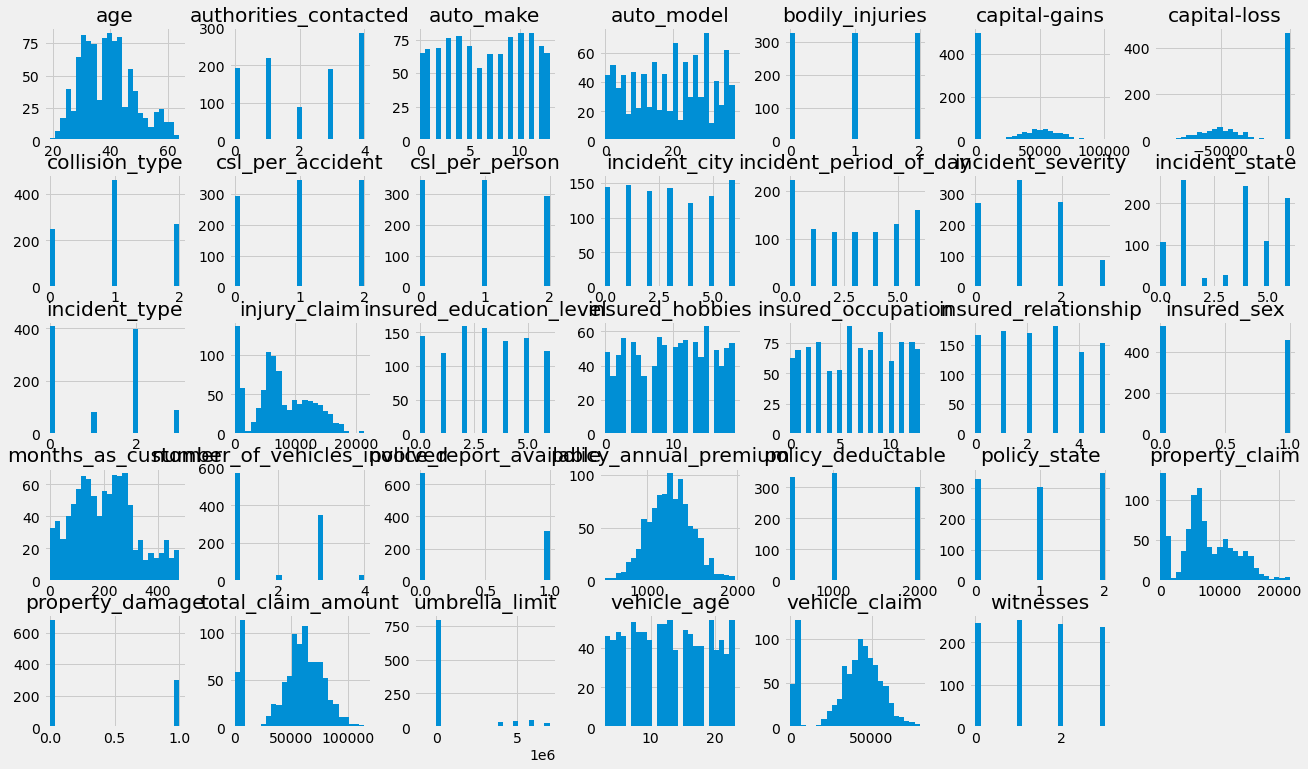

In [239]:
x.hist(figsize=(20,12), layout= (5,7), grid= True, bins=25)

Observations: We can see that almost all columns have normaly distributed data.

In [240]:
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.593593


Observations: We can see for the all columns skewness is within limit.

In [241]:
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vehicle_age,incident_period_of_day,csl_per_person,csl_per_accident
0,328,48,2,1000,1406.91,0,1,4,2,17,...,71610,6510,13020,52080,10,1,14,1,1,2
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,5070,780,780,3510,8,12,11,4,1,2
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,34650,7700,3850,23100,4,30,11,4,0,1
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,63400,6340,6340,50720,3,34,4,1,1,2
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,6500,1300,650,4550,0,31,9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,87200,17440,8720,61040,6,6,12,2,2,0
996,285,41,0,1000,1436.79,0,0,6,9,17,...,108480,18080,18080,72320,13,28,3,5,0,1
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,67500,7500,7500,52500,11,19,22,1,1,2
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,46980,5220,5220,36540,1,5,20,6,2,0


In [242]:
y

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [243]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vehicle_age,incident_period_of_day,csl_per_person,csl_per_accident
0,1.069568,0.983352,1.179821,-0.224643,0.620031,-0.467878,1.071971,0.532901,-1.156087,1.275279,...,0.718507,-0.187627,1.176015,0.753824,0.851959,-1.640447,0.188594,-0.835637,0.067231,1.180118
1,0.202726,0.329711,-0.024580,1.412161,-0.248448,1.890767,1.071971,0.532901,-0.160292,0.923775,...,-1.808821,-1.361005,-1.378984,-1.824679,0.355279,-0.651740,-0.310476,0.539166,0.067231,1.180118
2,-0.612105,-1.086511,1.179821,1.412161,0.645834,1.890767,-0.932861,1.556905,1.084451,-1.361003,...,-0.685311,0.056059,-0.738147,-0.784678,-0.638083,0.966145,-0.310476,0.539166,-1.175916,-0.064786
3,0.445442,0.220771,-1.228980,1.412161,0.656603,2.362496,-0.932861,1.556905,-1.405036,-1.361003,...,0.406674,-0.222439,-0.218380,0.681623,-0.886423,1.325675,-1.474975,-0.835637,0.067231,1.180118
4,0.202726,0.547591,-1.228980,-0.224643,1.353117,2.362496,1.071971,-1.515109,1.084451,-1.361003,...,-1.754507,-1.254521,-1.406121,-1.769467,-1.631444,1.056027,-0.643190,-0.377369,1.310379,-1.309689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,-1.747669,-0.106050,1.179821,-0.224643,0.221970,-0.467878,-0.932861,1.044903,-1.156087,0.572270,...,1.310648,2.050597,0.278425,1.229496,-0.141402,-1.191035,-0.144119,-0.377369,1.310379,-1.309689
976,0.696826,0.220771,-1.228980,-0.224643,0.743786,-0.467878,-0.932861,1.556905,0.586554,1.275279,...,2.118906,2.181655,2.232248,1.828332,1.596980,0.786380,-1.641332,0.997434,-1.175916,-0.064786
977,-0.646779,-0.541810,1.179821,-1.043045,0.523032,0.947309,-0.932861,1.044903,-1.405036,-1.185251,...,0.562400,0.015103,0.023760,0.776121,1.100300,-0.022562,1.519450,-0.835637,0.067231,1.180118
978,2.196463,2.508513,-1.228980,1.412161,0.412986,1.890767,1.071971,-1.515109,-0.409241,-1.712507,...,-0.216992,-0.451791,-0.452171,-0.071170,-1.383104,-1.280917,1.186736,1.455701,1.310379,-1.309689


In [244]:
#Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import joblib
import warnings
warnings.filterwarnings('ignore')

In [245]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=i)
    lg= LogisticRegression()
    lg.fit(x_train, y_train)
    pred_lg= lg.predict(x_test)
    acc= accuracy_score(y_test, pred_lg)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.8401360544217688
63


In [246]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=63)

In [247]:
x_train.shape

(686, 34)

In [248]:
x_test.shape

(294, 34)

In [249]:
lg= LogisticRegression()
gnb= GaussianNB()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rf= RandomForestClassifier()
ad= AdaBoostClassifier()
xgb= XGBClassifier()

models= [lg, gnb, svc, knn, dtc, rf,ad, xgb ]

for m in models:
    m.fit(x_train, y_train)
    predict= m.predict(x_test)
    print(m, 'Acuracy score -')
    print(accuracy_score(y_test, predict))
    print()

LogisticRegression() Acuracy score -
0.8401360544217688

GaussianNB() Acuracy score -
0.7585034013605442

SVC() Acuracy score -
0.7993197278911565

KNeighborsClassifier() Acuracy score -
0.7517006802721088

DecisionTreeClassifier() Acuracy score -
0.7653061224489796

RandomForestClassifier() Acuracy score -
0.8333333333333334

AdaBoostClassifier() Acuracy score -
0.826530612244898

[20:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_

In [250]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_m= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_m.mean())
    print()
    print()

CV score of  LogisticRegression() 0.7714285714285715


CV score of  GaussianNB() 0.7244897959183675


CV score of  SVC() 0.7489795918367348


CV score of  KNeighborsClassifier() 0.7183673469387755


CV score of  DecisionTreeClassifier() 0.7744897959183673


CV score of  RandomForestClassifier() 0.7571428571428571


CV score of  AdaBoostClassifier() 0.7959183673469388


[20:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:38:4

Observations: From above we can observe that for XGBClassifier model there is less difference in accuracy_score and cross validation accuracy_score so we will select XGBClassifier model for final predictions.

In [251]:
#Hyperparameter Tuning for Best selected model XGBClassifier

from sklearn.model_selection import GridSearchCV
from scipy import stats
from scipy.stats import randint


parameters= {'n_estimators': [150, 1000],
              'learning_rate': [0.01, 0.6],
              'subsample': [0.3, 0.9],
              'max_depth': [8, 9],
              'colsample_bytree': [0.5, 0.9],
              'min_child_weight': [3, 4]
             }

GSV= GridSearchCV(xgb, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

[20:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:38:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:38:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 150,
 'subsample': 0.9}

In [252]:
GCV_pred= GSV.best_estimator_.predict(x_test)
print('accuracy_score - ', accuracy_score(y_test, GCV_pred))
print(confusion_matrix(y_test, GCV_pred))
print(classification_report(y_test, GCV_pred))

accuracy_score -  0.8503401360544217
[[209  25]
 [ 19  41]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       234
           1       0.62      0.68      0.65        60

    accuracy                           0.85       294
   macro avg       0.77      0.79      0.78       294
weighted avg       0.86      0.85      0.85       294



In [253]:
# Plotting AUC-ROC curve for best model- XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [254]:
y_pred_prob= GSV.best_estimator_.predict_proba(x_test)[:,1]
y_pred_prob

array([0.1576156 , 0.17684543, 0.16110706, 0.16371535, 0.13648392,
       0.5330777 , 0.15928774, 0.14207241, 0.1386793 , 0.48882395,
       0.16153766, 0.21875179, 0.4475077 , 0.18209144, 0.5239745 ,
       0.6164454 , 0.1389637 , 0.5520528 , 0.61289275, 0.15533389,
       0.15264481, 0.17641973, 0.19459853, 0.54761595, 0.15006982,
       0.1526455 , 0.72447014, 0.6090705 , 0.1790999 , 0.42255712,
       0.1489982 , 0.15204716, 0.18006748, 0.5443567 , 0.6448888 ,
       0.5813508 , 0.65212995, 0.1724627 , 0.53952193, 0.18528816,
       0.65662086, 0.17286249, 0.18259168, 0.2061344 , 0.1658344 ,
       0.14746968, 0.16543286, 0.14296998, 0.58298576, 0.58383214,
       0.77714175, 0.14395876, 0.15624623, 0.14481118, 0.5797932 ,
       0.56878096, 0.17303735, 0.15522051, 0.15210189, 0.6021155 ,
       0.1465523 , 0.17662713, 0.16230892, 0.4380067 , 0.1944273 ,
       0.15979323, 0.5718625 , 0.19712187, 0.577051  , 0.15023607,
       0.14489727, 0.164539  , 0.17910872, 0.1449598 , 0.14022

In [255]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

In [256]:
fpr

array([0.        , 0.        , 0.        , 0.00854701, 0.00854701,
       0.01709402, 0.01709402, 0.02136752, 0.02136752, 0.04700855,
       0.04700855, 0.05128205, 0.05128205, 0.05555556, 0.05555556,
       0.05982906, 0.05982906, 0.06837607, 0.06837607, 0.07264957,
       0.07264957, 0.07692308, 0.07692308, 0.08547009, 0.08547009,
       0.1025641 , 0.1025641 , 0.10683761, 0.10683761, 0.11111111,
       0.11111111, 0.11965812, 0.11965812, 0.13247863, 0.13247863,
       0.13675214, 0.13675214, 0.21367521, 0.21367521, 0.31623932,
       0.31623932, 0.55555556, 0.55555556, 0.85042735, 0.85042735,
       0.8974359 , 0.8974359 , 0.91880342, 0.91880342, 0.93162393,
       0.93162393, 1.        ])

In [257]:
tpr

array([0.        , 0.01666667, 0.05      , 0.05      , 0.06666667,
       0.06666667, 0.13333333, 0.13333333, 0.21666667, 0.21666667,
       0.26666667, 0.26666667, 0.28333333, 0.28333333, 0.31666667,
       0.31666667, 0.35      , 0.35      , 0.36666667, 0.36666667,
       0.4       , 0.4       , 0.55      , 0.55      , 0.56666667,
       0.56666667, 0.6       , 0.6       , 0.7       , 0.7       ,
       0.75      , 0.75      , 0.76666667, 0.76666667, 0.83333333,
       0.83333333, 0.86666667, 0.86666667, 0.9       , 0.9       ,
       0.91666667, 0.91666667, 0.93333333, 0.93333333, 0.95      ,
       0.95      , 0.96666667, 0.96666667, 0.98333333, 0.98333333,
       1.        , 1.        ])

In [258]:
thresholds

array([1.7771418 , 0.77714175, 0.7729482 , 0.7500021 , 0.74220693,
       0.72447014, 0.7055065 , 0.69930416, 0.6448888 , 0.6132207 ,
       0.60779834, 0.60471666, 0.6021155 , 0.60203224, 0.5964375 ,
       0.58383214, 0.5813508 , 0.5781977 , 0.57707506, 0.577051  ,
       0.5718625 , 0.5712563 , 0.5443567 , 0.53957725, 0.53952193,
       0.52801967, 0.5239745 , 0.5226579 , 0.4960642 , 0.48882395,
       0.47117174, 0.45998943, 0.44973555, 0.44043824, 0.42618906,
       0.42255712, 0.40629962, 0.19939461, 0.19794834, 0.1842803 ,
       0.18312885, 0.16445798, 0.1641283 , 0.14746968, 0.14729692,
       0.1449598 , 0.14489727, 0.14404462, 0.14395876, 0.14252056,
       0.14207241, 0.13458642], dtype=float32)

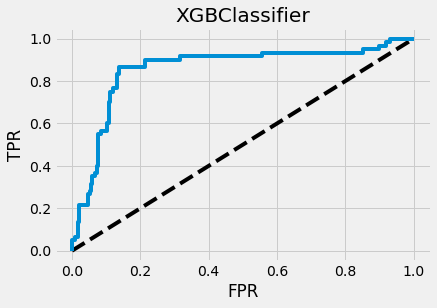

In [259]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'XGBClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('XGBClassifier')
plt.show()

Observations: We can observe that A plot of the ROC Curve confirms the AUC interpretation of a best model for most probability thresholds.

In [260]:
print(roc_auc_score(y_test, GSV.best_estimator_.predict(x_test)))

0.7882478632478633


In [261]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'Automobile_insurance_fraud_Analysis_best_XGB_model.obj')

['Automobile_insurance_fraud_Analysis_best_XGB_model.obj']

Conclusion: For Analysis of Automobile_insurance_fraud_Analysis we have selected XGBClassifier model which having accuracy of almost 85%.